In [1]:
#importing basic modules
import numpy as np
import pandas as pd

In [2]:
#loading csv file into dataframes
df=pd.read_csv("emails.csv")
df.sample(5)

,text,spam
4674,Subject: enterprise risk management dear vinc...,0
801,"Subject: localized software , all languages av...",1
4112,Subject: mid - year 2000 performance feedback ...,0
3558,"Subject: dr . kaminski , thank you for giving...",0
3569,Subject: moddeling support for dpc related iss...,0


In [3]:
#shape gives u no. of rows and columns in dataframe
df.shape

(5728, 2)

# Data Cleaning

In [4]:
#info related to dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
#gives you detailed description about the dataframe
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
#renamed the spam column to target
df.rename(columns={'spam':'target'},inplace=True)

# Missing Values

In [7]:
#count of null values
df.isnull().sum()

text      0
target    0
dtype: int64

Check for duplicate values

In [8]:
#count of duplicate rows
df.duplicated().sum()

33

Drop all the duplicate values

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5695, 2)

## data is now clean and ready for next steps

# Exploratory data analysis

In [12]:
#gives you count of different values in target column
df['target'].value_counts()

0    4327
1    1368
Name: target, dtype: int64

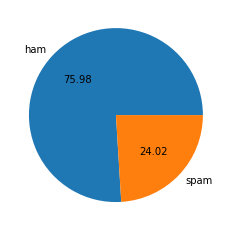

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Data is Imbalance

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/arcaneop/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters'] = df['text'].apply(len)

In [17]:
df.head()

,text,target,num_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


## Nums of words

In [18]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df.head()

,text,target,num_characters,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,target,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,9
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,5


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,15.883231
std,2047.078711,419.654234,26.653283
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,6.000000
50%,979.000000,211.000000,10.000000
75%,1893.000000,403.000000,18.000000
max,43952.000000,8479.000000,1229.000000


In [22]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,16.097065
std,1965.016383,407.227757,28.170659
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,6.000000
50%,1122.000000,240.000000,11.000000
75%,2037.500000,440.500000,19.000000
max,43952.000000,8479.000000,1229.000000


In [23]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,15.206871
std,2271.372893,451.623124,21.143714
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,5.000000
50%,693.500000,141.000000,9.000000
75%,1250.250000,252.000000,16.000000
max,28432.000000,6131.000000,329.000000


In [24]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

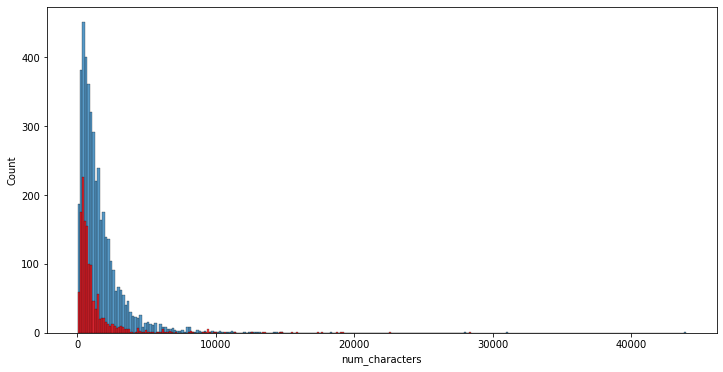

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

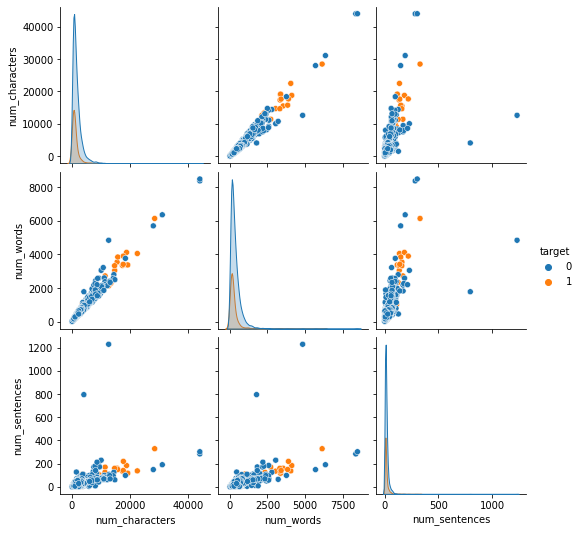

In [26]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

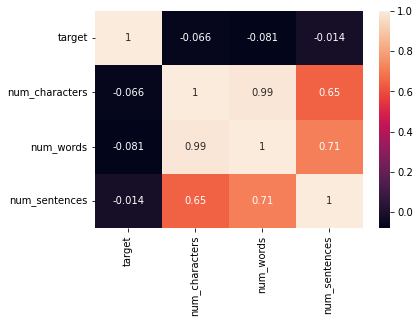

In [27]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [28]:
from nltk.corpus import stopwords
import string 
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arcaneop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps=PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [30]:
transform_text("The fox in the tophat whispered into the ear of the rabbit.")

'fox tophat whisper ear rabbit'

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)
df.sample()

,text,target,num_characters,num_words,num_sentences,transformed_text
4872,Subject: march ny real options conference ple...,0,1707,320,13,subject march ny real option confer pleas find...


In [32]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,9,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,5,subject money get softwar cd softwar compat gr...


In [33]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(width=1500,height=1500,min_font_size=10,background_color='white')

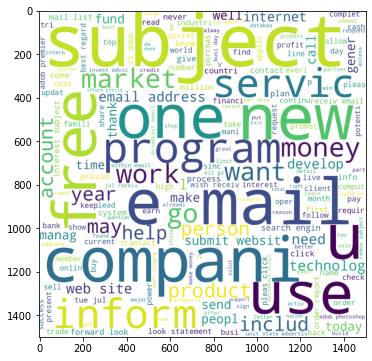

In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

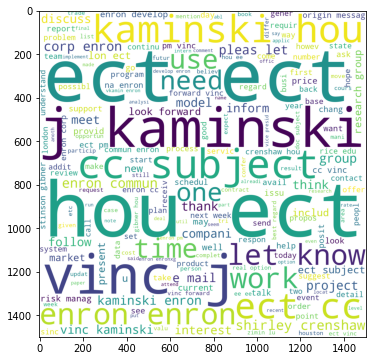

In [36]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [38]:
len(spam_corpus)

174630

/home/arcaneop/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


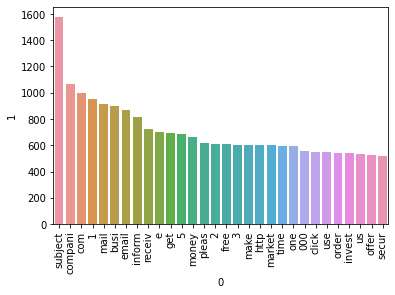

In [39]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

702991

/home/arcaneop/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


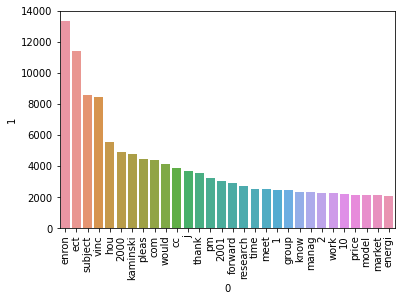

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
# Text Vectorization
# using Bag of Words
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,9,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,5,subject money get softwar cd softwar compat gr...


# Model building

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [45]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [46]:
X.shape

(5695, 3000)

In [47]:
y = df['target'].values

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95171202809482
[[837  12]
 [ 43 247]]
0.9536679536679536


In [52]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9850746268656716
[[846   3]
 [ 14 276]]
0.989247311827957


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429323968393327
[[785  64]
 [  1 289]]
0.8186968838526912


# tfidf --> MNB

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [57]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [58]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.990342405618964, 0.9929328621908127)

In [59]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.990342405618964
Precision -  0.9929328621908127
For  KN
Accuracy -  0.9771729587357331
Precision -  0.9782608695652174
For  NB
Accuracy -  0.9850746268656716
Precision -  0.989247311827957
For  DT
Accuracy -  0.9236172080772608
Precision -  0.8048048048048048
For  LR
Accuracy -  0.971027216856892
Precision -  0.9706959706959707
For  RF
Accuracy -  0.9824407374890255
Precision -  0.9927007299270073
For  AdaBoost
Accuracy -  0.9692712906057945
Precision -  0.967032967032967
For  BgC
Accuracy -  0.9657594381035997
Precision -  0.9403508771929825
For  ETC
Accuracy -  0.9833187006145742
Precision -  0.9927272727272727
For  GBDT
Accuracy -  0.9561018437225637
Precision -  0.9651162790697675
For  xgb
Accuracy -  0.9850746268656716
Precision -  0.9595959595959596


In [60]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.990342,0.992933
2,NB,0.985075,0.989247
10,xgb,0.985075,0.959596
8,ETC,0.983319,0.992727
5,RF,0.982441,0.992701
1,KN,0.977173,0.978261
4,LR,0.971027,0.970696
6,AdaBoost,0.969271,0.967033
7,BgC,0.965759,0.940351
9,GBDT,0.956102,0.965116


In [61]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.990342
1,NB,Accuracy,0.985075
2,xgb,Accuracy,0.985075
3,ETC,Accuracy,0.983319
4,RF,Accuracy,0.982441
5,KN,Accuracy,0.977173
6,LR,Accuracy,0.971027
7,AdaBoost,Accuracy,0.969271
8,BgC,Accuracy,0.965759
9,GBDT,Accuracy,0.956102


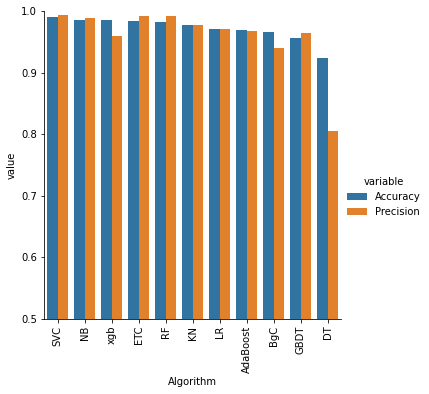

In [62]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.990342,0.992933,0.990342,0.992933,0.990342,0.992933,0.990342,0.992933
1,NB,0.985075,0.989247,0.985075,0.989247,0.985075,0.989247,0.985075,0.989247
2,xgb,0.985075,0.959596,0.985075,0.959596,0.985075,0.959596,0.985075,0.959596
3,ETC,0.983319,0.992727,0.983319,0.992727,0.983319,0.992727,0.983319,0.992727
4,RF,0.982441,0.992701,0.982441,0.992701,0.982441,0.992701,0.982441,0.992701
5,KN,0.977173,0.978261,0.977173,0.978261,0.977173,0.978261,0.977173,0.978261
6,LR,0.971027,0.970696,0.971027,0.970696,0.971027,0.970696,0.971027,0.970696
7,AdaBoost,0.969271,0.967033,0.969271,0.967033,0.969271,0.967033,0.969271,0.967033
8,BgC,0.965759,0.940351,0.965759,0.940351,0.965759,0.940351,0.965759,0.940351
9,GBDT,0.956102,0.965116,0.956102,0.965116,0.956102,0.965116,0.956102,0.965116


In [64]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [65]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [66]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.990342405618964
Precision 0.9929328621908127


In [67]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [68]:
from sklearn.ensemble import StackingClassifier

In [69]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.990342405618964
Precision 0.9860627177700348


In [95]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9850746268656716
Precision 0.989247311827957


In [98]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))